In [3]:
import cv2
import torch
import numpy as np
from torchvision import transforms
from PIL import Image

# Load pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # lightweight

# Dummy expression classifier (Replace with your trained model later)
def dummy_expression_classifier(face_img):
    # For testing purposes
    return "Sleepy" if np.random.rand() > 0.5 else "Awake"

# Start webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Inference
    results = model(frame)

    for *xyxy, conf, cls in results.xyxy[0]:
        label = model.names[int(cls)]
        if label == 'person':  # or 'face' if you're using a face detector
            x1, y1, x2, y2 = map(int, xyxy)
            face = frame[y1:y2, x1:x2]

            # Convert to PIL for expression classification
            face_img = Image.fromarray(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
            expression = dummy_expression_classifier(face_img)

            # Draw box and label
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, expression, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    cv2.imshow("Facial Expression Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Jaya/.cache\torch\hub\master.zip
requirements: Ultralytics requirement ['pillow>=10.3.0'] not found, attempting AutoUpdate...
WARNING requirements:  AutoUpdate skipped (offline)


YOLOv5  2025-6-11 Python-3.12.7 torch-2.7.0+cpu CPU

100%|█████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:01<00:00, 7.79MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [4]:
!pip install opencv-python

In [5]:
!pip install opencv-python-headless deepface

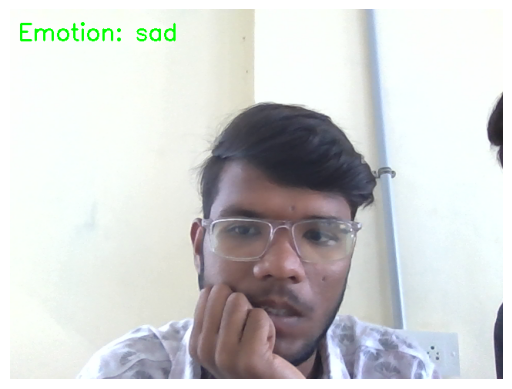

In [ ]:
import cv2
from deepface import DeepFace
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Start webcam
cap = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Flip for natural view
        frame = cv2.flip(frame, 1)

        try:
            # Analyze the facial expression
            result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
            emotion = result[0]['dominant_emotion']

            # Put emotion on frame
            cv2.putText(frame, f'Emotion: {emotion}', (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 
                        1, (0, 255, 0), 2)
        except:
            cv2.putText(frame, 'No Face Detected', (10, 40), cv2.FONT_HERSHEY_SIMPLEX,
                        1, (0, 0, 255), 2)

        # Convert for matplotlib
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display in notebook
        clear_output(wait=True)
        plt.imshow(rgb)
        plt.axis('off')
        display(plt.gcf())

except KeyboardInterrupt:
    print("Stopped manually")

cap.release()
cv2.destroyAllWindows()